<a href="https://colab.research.google.com/github/Arash-Razi/ML_Dr_Aliyari_Course_2025/blob/main/MiniP4/ML2025_MiniP4_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini Project 4 - 2nd Problem**
In this question, we will simulate the article A real-time collaborative machine learning based weather forecasting system with multiple predictor locations.
This article aims to improve the quality of its model using data from different regions for weather forecasting in a given area.
In this study, different algorithms have been examined, each trained on different data models for different purposes.
In addition, in this question, we also intend to get acquainted with the implementation and training of a neural network for the regression problem using collaborative machine learning.

## **Import libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from abc import ABC,abstractmethod
import copy
import matplotlib.pyplot as plt
from tqdm import tqdm



## **Import Dataset**

### Download Dataset

In [ ]:
!gdown 1FT0RmbAuIaJcNLsCu92ot3TQpIF6dvia

Downloading...
From: https://drive.google.com/uc?id=1FT0RmbAuIaJcNLsCu92ot3TQpIF6dvia
To: /content/weather_prediction_dataset.csv
100% 2.77M/2.77M [00:00<00:00, 44.2MB/s]


### Store Dataset as DataFrame

In [ ]:
df = pd.read_csv('/content/weather_prediction_dataset.csv')
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


## **Dataset Preprocessing**

### Select French Cities
In this section, I **standardize the column names of the input dataset to lowercase to avoid case-sensitivity issues** when selecting columns.  
Then, I extract only the columns corresponding to the three specific predictor locations (*Montelimar*, *Perpignan*, and *Tours*), which are relevant to cities located in france.  

In [ ]:
df.columns = df.columns.str.lower()
df_france = df.iloc[:,df.columns.str.contains("Montelimar|Perpignan|Tours",case=False)]
df_france

,montelimar_wind_speed,montelimar_humidity,montelimar_pressure,montelimar_global_radiation,montelimar_precipitation,montelimar_temp_mean,montelimar_temp_min,montelimar_temp_max,perpignan_wind_speed,perpignan_humidity,...,perpignan_temp_min,perpignan_temp_max,tours_wind_speed,tours_humidity,tours_pressure,tours_global_radiation,tours_precipitation,tours_temp_mean,tours_temp_min,tours_temp_max
0,3.8,0.85,1.0269,0.30,0.00,5.5,2.5,8.5,4.4,0.71,...,10.3,14.0,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,5.8,0.82,1.0287,0.54,0.00,8.3,6.8,9.8,2.9,0.67,...,5.1,14.6,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,0.4,0.92,1.0316,0.53,0.00,3.2,-2.1,8.5,2.5,0.85,...,4.1,13.2,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,1.1,0.85,1.0274,0.64,0.00,7.2,2.3,12.1,1.5,0.85,...,4.3,12.8,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,3.4,0.82,1.0234,0.70,0.00,8.2,1.5,14.8,2.6,0.74,...,3.6,14.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,0.4,0.87,1.0077,0.17,0.00,3.6,0.6,6.6,1.7,0.82,...,4.1,12.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,1.8,0.84,1.0060,0.33,0.16,9.4,6.0,12.7,1.6,0.87,...,4.8,14.1,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,0.9,0.94,1.0006,0.30,0.78,10.8,7.8,13.7,1.8,0.92,...,9.5,14.3,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,0.3,0.90,0.9954,0.59,0.66,11.2,6.9,15.4,2.2,0.90,...,5.3,12.2,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


### Feature Scaling

In this section, I normalize the selected predictor location data using **standard scaling** (**z-score normalization**).  
This transformation ensures that each feature has a mean of 0 and standard deviation of 1, which is essential for the stability and efficiency of gradient-based learning algorithms.

In [ ]:
scalar = StandardScaler()
scaled_data  = scalar.fit_transform(df_france)
df_france = pd.DataFrame(scaled_data,columns=df_france.columns)
df_france

,montelimar_wind_speed,montelimar_humidity,montelimar_pressure,montelimar_global_radiation,montelimar_precipitation,montelimar_temp_mean,montelimar_temp_min,montelimar_temp_max,perpignan_wind_speed,perpignan_humidity,...,perpignan_temp_min,perpignan_temp_max,tours_wind_speed,tours_humidity,tours_pressure,tours_global_radiation,tours_precipitation,tours_temp_mean,tours_temp_min,tours_temp_max
0,0.055794,1.234100,1.403432,-1.338511,-0.278296,-1.215249,-1.112137,-1.221159,-0.101612,0.392227,...,-0.206481,-0.925635,-1.366925,1.628018,0.575189,-1.208822,-0.346132,-0.573097,-0.116057,-0.875278
1,0.993139,1.001553,1.661052,-1.100162,-0.278296,-0.825979,-0.432387,-1.069226,-0.667434,0.123938,...,-1.022423,-0.839601,-1.103708,1.801093,0.670518,-1.295183,-0.061835,-0.665886,-0.221478,-0.953060
2,-1.537692,1.776710,2.076108,-1.110093,-0.278296,-1.535007,-1.839311,-1.221159,-0.818319,1.331237,...,-1.179335,-1.040347,-0.182448,1.108791,0.532821,-1.187232,-0.440898,-0.634957,-0.221478,-0.901205
3,-1.209621,1.234100,1.474993,-1.000850,-0.278296,-0.978907,-1.143753,-0.800422,-1.195533,1.331237,...,-1.147952,-1.097704,0.804617,1.454942,0.294499,-1.359953,0.601525,-0.557632,-0.256618,-0.745641
4,-0.131675,1.001553,0.902503,-0.941263,-0.278296,-0.839881,-1.270218,-0.484869,-0.780598,0.593444,...,-1.257791,-0.796583,-0.050839,1.454942,0.225651,-1.057690,-0.346132,-0.650422,-0.256618,-0.914169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,-1.537692,1.389132,-1.344522,-1.467617,-0.278296,-1.479397,-1.412491,-1.443215,-1.120091,1.130021,...,-1.179335,-1.155060,0.014965,1.454942,-0.822963,-1.241207,3.112816,-0.928789,-1.064844,-0.771569
3650,-0.881550,1.156584,-1.587830,-1.308717,-0.102595,-0.673051,-0.558852,-0.730299,-1.157812,1.465382,...,-1.069496,-0.911296,1.067834,0.935716,-1.061285,-1.219617,0.506759,-0.279265,-0.291758,-0.265986
3651,-1.303355,1.931742,-2.360692,-1.338511,0.578248,-0.478416,-0.274306,-0.613428,-1.082369,1.800742,...,-0.332010,-0.882618,0.080770,0.849178,-1.204278,-1.219617,1.928245,-0.341124,0.147495,-0.680823
3652,-1.584559,1.621679,-3.104930,-1.050506,0.446472,-0.422806,-0.416579,-0.414746,-0.931483,1.666598,...,-0.991041,-1.183738,0.343987,0.849178,-1.236054,-0.852583,-0.393515,-0.573097,-0.291758,-0.732678


### Train-Test Split

In this section, I split the scaled dataset into training and testing subsets.  
The first 3288 samples are used for training the model, while the remaining samples are reserved for testing.  
The test set index is reset to ensure a clean, continuous index for downstream tasks.


In [ ]:
df_train = df_france.iloc[0:3288,:]
df_test = df_france.iloc[3289:,:]

df_test.reset_index(drop=True)

,montelimar_wind_speed,montelimar_humidity,montelimar_pressure,montelimar_global_radiation,montelimar_precipitation,montelimar_temp_mean,montelimar_temp_min,montelimar_temp_max,perpignan_wind_speed,perpignan_humidity,...,perpignan_temp_min,perpignan_temp_max,tours_wind_speed,tours_humidity,tours_pressure,tours_global_radiation,tours_precipitation,tours_temp_mean,tours_temp_min,tours_temp_max
0,1.274342,0.924037,0.559008,-1.477548,-0.278296,-1.674033,-1.238602,-1.899013,-1.459583,1.264165,...,-0.991041,-1.441841,0.804617,1.281867,0.416308,-1.392339,-0.440898,-1.949470,-1.574378,-2.093863
1,1.040006,-0.083668,0.473135,-0.921400,-0.278296,-1.590618,-1.254410,-1.735393,-1.082369,1.264165,...,-1.493159,-1.828996,1.528464,0.070339,0.368644,-0.733837,-0.440898,-1.903076,-1.627088,-2.003117
2,1.555546,-0.006152,0.387261,-0.792295,-0.278296,-1.729643,-1.380875,-1.875639,-0.063891,-0.278494,...,-1.367629,-1.355807,-1.169512,0.676103,0.342164,-0.744632,-0.440898,-2.258768,-2.312323,-2.080899
3,1.086873,0.303911,-0.213853,-1.159749,-0.278296,-2.035498,-1.902543,-2.015885,-0.026170,-0.211422,...,-1.257791,-1.628249,-1.103708,1.195329,0.077362,-1.284387,-0.061835,-2.568065,-2.593446,-2.392027
4,1.649280,0.071364,-0.399913,-1.070368,-0.278296,-1.952083,-1.617997,-2.086007,-0.365662,-0.010206,...,-1.461776,-2.130116,0.212378,0.329952,0.230947,-0.766222,-0.440898,-2.645389,-2.821857,-2.353136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-1.537692,1.389132,-1.344522,-1.467617,-0.278296,-1.479397,-1.412491,-1.443215,-1.120091,1.130021,...,-1.179335,-1.155060,0.014965,1.454942,-0.822963,-1.241207,3.112816,-0.928789,-1.064844,-0.771569
361,-0.881550,1.156584,-1.587830,-1.308717,-0.102595,-0.673051,-0.558852,-0.730299,-1.157812,1.465382,...,-1.069496,-0.911296,1.067834,0.935716,-1.061285,-1.219617,0.506759,-0.279265,-0.291758,-0.265986
362,-1.303355,1.931742,-2.360692,-1.338511,0.578248,-0.478416,-0.274306,-0.613428,-1.082369,1.800742,...,-0.332010,-0.882618,0.080770,0.849178,-1.204278,-1.219617,1.928245,-0.341124,0.147495,-0.680823
363,-1.584559,1.621679,-3.104930,-1.050506,0.446472,-0.422806,-0.416579,-0.414746,-0.931483,1.666598,...,-0.991041,-1.183738,0.343987,0.849178,-1.236054,-0.852583,-0.393515,-0.573097,-0.291758,-0.732678


### Sliding Window Transformation

Here, I define and apply a sliding window function to convert the time-series data into overlapping sequences suitable for supervised learning.  
Each sample consists of `window_size` consecutive time steps, and the window moves forward by a given `stride`.  
This transformation generates a 3D array of shape *(num_samples, window_size, num_features)*.

After defining the function, I apply it to both the training and test datasets using a **window size of 5 and a stride of 1.**


In [ ]:
def sliding_window(df, window_size, stride=1):
    """
    Apply a sliding window transformation on a DataFrame.

    Parameters:
    df : pd.DataFrame - Input data
    window_size : int - Number of past time steps per sample
    stride : int - Step size for moving the window

    Returns:
    np.array - 3D array of shape (num_samples, window_size, num_features)
    """
    # Number of features
    n = df.shape[1]

    # Convert DataFrame to NumPy array
    data = df.values  # Shape: (time_steps, features)

    # Create sliding window view
    windows = np.lib.stride_tricks.sliding_window_view(data, (window_size, n))

    # Reshape the Dimension:
    windows = windows.reshape(-1,window_size,n)

    # Apply stride by selecting every 'stride' step
    windows = windows[::stride]  # Shape: (num_samples, window_size, n)

    return windows

In [ ]:
window_size = 5
stride = 1

In [ ]:
windows_train = sliding_window(df_train,window_size,stride)
windows_test = sliding_window(df_test,window_size,stride)

### Generating Labels

After creating the sliding window inputs, I extract the corresponding target labels for each window.  
For each sample, the label is the observation at the last time step of the window.  
This is achieved by selecting rows starting at `window_size - 1` with the same `stride` as the windows, ensuring proper alignment between inputs and targets.


In [ ]:
target_city = 'montelimar'
target_cols = [col for col in df_france.columns if target_city in col]

In [ ]:
labels_train = df_train.iloc[window_size-1::stride,:][target_cols]
labels_test = df_test.iloc[window_size-1::stride,:][target_cols]
labels_test.shape

(361, 8)

In [ ]:
X_train = windows_train.reshape(windows_train.shape[0], -1).T  # shape: (features, samples)
X_test = windows_test.reshape(windows_test.shape[0], -1).T

y_train = labels_train.T  #shape: (features, samples)
y_test = labels_test.T




## Implemeting MPL classifier

In [ ]:
class ActiveFunction(ABC):

    @abstractmethod
    def function(self):
        ...

    @abstractmethod
    def backward(self,dA,cache):
        ...

In [ ]:
class Sigmoid(ActiveFunction):

    def function(self,Z):
        return 1 / (1+np.exp(-Z))


    def backward(self, dA, cache):
        Z = cache
        A = self.function(Z)
        dZ = dA*A*(1-A)

        return dZ



In [ ]:
class Relu(ActiveFunction):

    def function(self, Z):
        return np.maximum(0, Z)

    def backward(self, dA, cache):
        Z = cache
        A = self.function(Z)
        dZ = np.array(dA, copy=True)
        dZ[Z <= 0] = 0

        return dZ


In [ ]:
class Linear(ActiveFunction):

    def function(self, Z):
        # Identity function: f(z) = z
        return Z

    def backward(self, dA, cache):
        Z = cache
        # Derivative of identity is 1, so dZ = dA
        dZ = np.array(dA, copy=True)
        return dZ


In [ ]:
class CostFunction(ABC):

    @abstractmethod
    def compute_cost(self,y_hat,y):
        ...

    @abstractmethod
    def backward(self,y_hat,y):
        ...


In [ ]:
class MSE(CostFunction):

    def compute_cost(self, y_hat, y):

        m = y.shape[1]
        mse = 0.5*np.dot((y_hat-y),(y_hat-y).T)/m
        return mse

    def backward(self,y_hat,y):

        return y_hat - y

In [ ]:
class MLP:
    def __init__(self, layers_dim: list[int], activations: list, costFcn):
        if len(layers_dim) + 1 != len(activations):
            raise ValueError("Error: Invalid Activation and Layers Size!")
        self.__parameters = dict()
        self.__layers_dim = layers_dim
        self.__activations = activations
        self.__costFcn = costFcn

    def _initialize_parameters(self):
        L = len(self.__layers_dim)

        for l in range(1, L):
            # He initialization
            self.__parameters['W' + str(l)] = np.random.randn(
                self.__layers_dim[l], self.__layers_dim[l-1]
            ) * np.sqrt(2 / self.__layers_dim[l-1])
            self.__parameters['b' + str(l)] = np.zeros((self.__layers_dim[l], 1))

    def fit(
        self,
        X_train,
        y_train,
        X_test=None,
        y_test=None,
        num_epochs=100,
        learning_rate=0.01,
        batch_size=32
    ):
        """
        Train the MLP for a fixed number of epochs with a given batch size.

        num_epochs: number of full passes over the data
        batch_size: number of samples per batch
        """
        input_dim = X_train.shape[0]
        output_dim = y_train.shape[0]

        self.__layers_dim.insert(0, input_dim)
        self.__layers_dim.append(output_dim)
        self._initialize_parameters()
        m = X_train.shape[1]

        train_errors = []
        test_errors = []

        # NEW: Lists to track specific weights
        tracked_weight1 = []
        tracked_weight2 = []

        for epoch in tqdm(range(num_epochs), desc="Training Progress"):
            # Shuffle at the start of each epoch
            permutation = np.random.permutation(m)
            X_shuffled = X_train[:, permutation]
            if isinstance(y_train, np.ndarray):
                y_shuffled = y_train[:, permutation]
            else:  # pandas DataFrame fallback
                y_shuffled = y_train.values[:, permutation]

            # Loop over mini-batches
            for batch_idx in range(0, m, batch_size):
                X_batch = X_shuffled[:, batch_idx:batch_idx+batch_size]
                y_batch = y_shuffled[:, batch_idx:batch_idx+batch_size]

                AL, caches = self._forward(X_batch, self.__parameters, self.__activations)
                grads = self._backward(AL, y_batch, caches)
                self.__parameters = self.update_parameters(self.__parameters, grads, learning_rate)

            # Compute and store errors at the end of the epoch
            train_mse = self.score(X_train, y_train)
            train_errors.append(train_mse)

            if X_test is not None and y_test is not None:
                test_mse = self.score(X_test, y_test)
                test_errors.append(test_mse)

            # NEW: Track specific weights
            tracked_weight1.append(self.__parameters['W1'][0, 0])
            tracked_weight2.append(self.__parameters['W1'][1, 0])

        # Plot errors
        plt.plot(train_errors, label="Train MSE")
        if test_errors:
            plt.plot(test_errors, label="Test MSE")
        plt.xlabel("Epoch")
        plt.ylabel("MSE")
        plt.title("Training and Test Error over Epochs")
        plt.legend()
        plt.show()

        # NEW: Plot tracked weights
        plt.figure()
        plt.plot(tracked_weight1, label='W1[0,0]')
        plt.plot(tracked_weight2, label='W1[1,0]')
        plt.xlabel("Epoch")
        plt.ylabel("Weight value")
        plt.title("Tracked Weights Over Epochs")
        plt.legend()
        plt.show()


    def predict(self, X):
        AL, _ = self._forward(X, self.__parameters, self.__activations)
        return AL

    def score(self, X, y_true):
      y_pred = self.predict(X)

      if isinstance(y_true, pd.DataFrame) or isinstance(y_true, pd.Series):
          y_true = y_true.values

      if y_true.shape != y_pred.shape:
          y_pred = y_pred.reshape(y_true.shape)

      mse = np.mean((y_true - y_pred) ** 2)
      return mse

    def _forward(self, X, parameters, activations):
        A = X
        caches = []

        for l in range(len(parameters) // 2):
            A_prev = A
            W = parameters['W' + str(l+1)]
            b = parameters['b' + str(l+1)]
            A, cache = self.linear_activation_forward(A_prev, W, b, activations[l])
            caches.append(cache)

        return A, caches

    def _linear_forward(self, A, W, b):
        Z = np.dot(W, A) + b
        cache = (A, W, b)
        return Z, cache

    def linear_activation_forward(self, A_prev, W, b, activation):
        Z, linear_cache = self._linear_forward(A_prev, W, b)
        A = activation.function(Z)
        activation_cache = Z
        cache = (linear_cache, activation_cache)
        return A, cache

    def compute_cost(self, AL, y, costFcn):
        cost = costFcn.compute_cost(y_hat=AL, y=y)
        cost = np.squeeze(cost)
        return cost

    def linear_backward(self, dZ, cache):
        A_prev, W, b = cache
        m = A_prev.shape[1]

        dW = np.dot(dZ, A_prev.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        dA_prev = np.dot(W.T, dZ)

        return dA_prev, dW, db

    def linear_activation_backward(self, dA, cache, activation):
        linear_cache, activation_cache = cache
        dZ = activation.backward(dA, activation_cache)
        dA_prev, dW, db = self.linear_backward(dZ, linear_cache)
        return dA_prev, dW, db

    def _backward(self, AL, Y, caches):
        grads = {}
        L = len(caches)
        m = AL.shape[1]
        Y = Y.reshape(AL.shape)

        dAL = self.__costFcn.backward(y_hat=AL, y=Y)

        current_cache = caches[L-1]
        dA_prev, dW, db = self.linear_activation_backward(
            dA=dAL, cache=current_cache, activation=self.__activations[-1])
        grads["dA" + str(L-1)] = dA_prev
        grads["dW" + str(L)] = dW
        grads["db" + str(L)] = db

        for l in reversed(range(L-1)):
            current_cache = caches[l]
            dA_prev, dW, db = self.linear_activation_backward(
                dA=grads["dA" + str(l+1)], cache=current_cache, activation=self.__activations[l])
            grads["dA" + str(l)] = dA_prev
            grads["dW" + str(l+1)] = dW
            grads["db" + str(l+1)] = db

        return grads

    def update_parameters(self, params, grads, learning_rate):
        parameters = copy.deepcopy(params)
        L = len(parameters) // 2

        for l in range(L):
            parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l+1)]
            parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l+1)]

        return parameters


### **Architecture 1**: MLP with 1 Hidden Layer
In this section, we define and train a simple multilayer perceptron (MLP) for a regression task. The network architecture consists of a **single hidden layer** with **32 neurons**, specified by layers_dim = [32], followed by an output layer. The hidden layer uses the **ReLU** activation function while the output layer uses a **Linear** activation, which is appropriate for regression problems. We initialize the MLP with these settings and set the loss function to **Mean Squared Error (MSE)**. Finally, the model is trained on the training data using stochastic gradient descent (SGD) by setting **batch_size=1**,**bold text** for 200 epochs.

In [ ]:
layers_dim = [32]

activations = [Relu(),Linear()]

mlp = MLP(layers_dim=layers_dim,activations=activations,costFcn=MSE())

#### **learning rate = 1**

Training Progress: 100%|██████████| 200/200 [01:14<00:00,  2.68it/s]


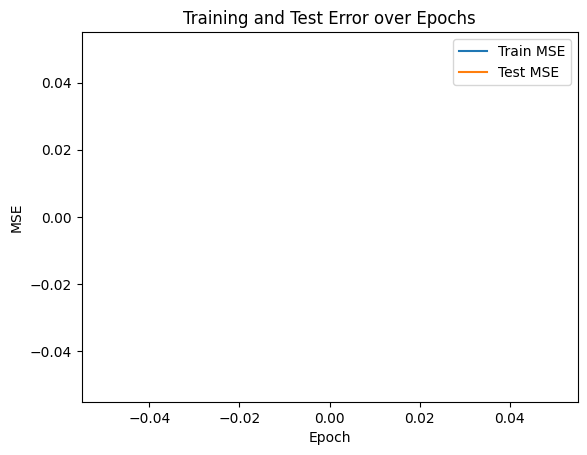

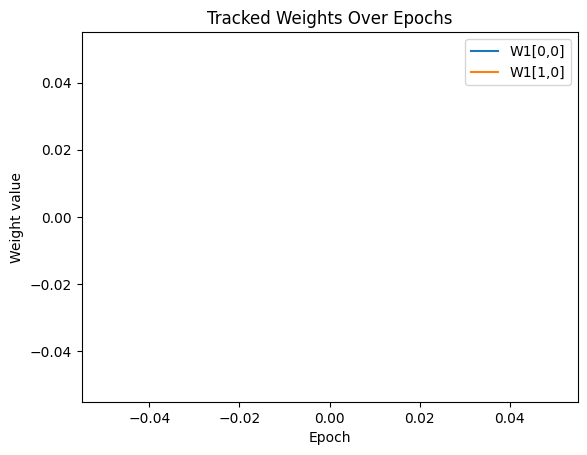

nan
nan


In [ ]:
learning_rate = 1

mlp.fit(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,batch_size=1,learning_rate=1,num_epochs=200)

print(mlp.score(X_train,y_train))
print(mlp.score(X_test,y_test))

#### **Learning Rate = 0.001**

Training Progress: 100%|██████████| 200/200 [01:15<00:00,  2.65it/s]


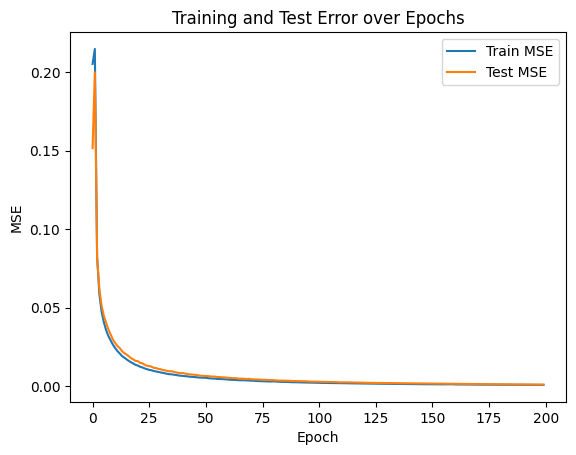

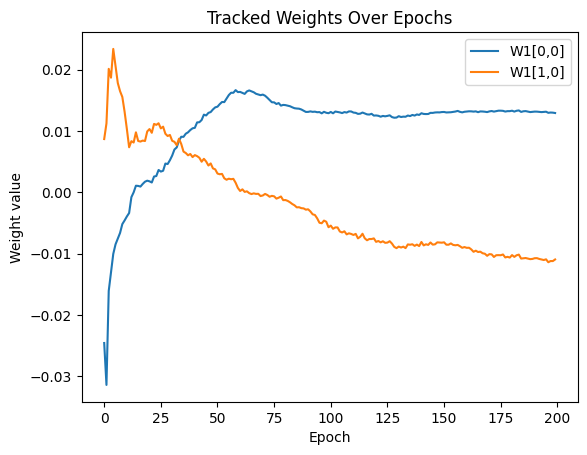

0.0006179515511969241
0.0008326022256910098


In [ ]:
learning_rate = 0.001
layers_dim = [32]
activations = [Relu(),Linear()]
mlp = MLP(layers_dim=layers_dim,activations=activations,costFcn=MSE())
mlp.fit(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,batch_size=1,learning_rate=learning_rate,num_epochs=200)

print(mlp.score(X_train,y_train))
print(mlp.score(X_test,y_test))

Training Progress: 100%|██████████| 200/200 [01:14<00:00,  2.67it/s]


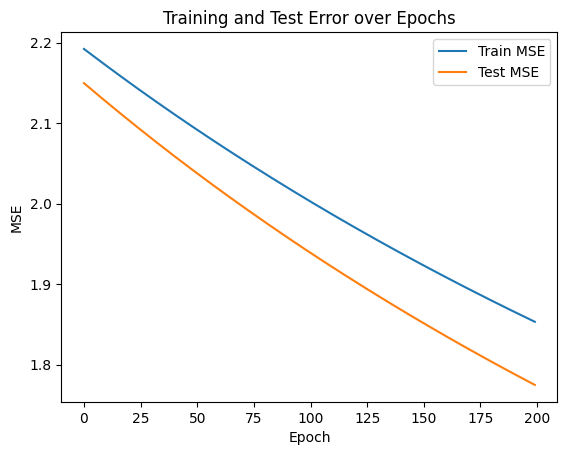

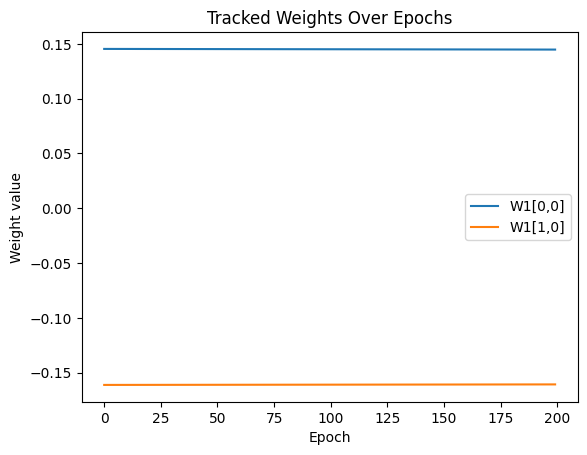

1.8531630101526004
1.7747437763363416


In [ ]:
learning_rate = 0.00000001
layers_dim = [32]
activations = [Relu(),Linear()]
mlp = MLP(layers_dim=layers_dim,activations=activations,costFcn=MSE())
mlp.fit(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,batch_size=1,learning_rate=learning_rate,num_epochs=200)

print(mlp.score(X_train,y_train))
print(mlp.score(X_test,y_test))

### Deeper Network
In this section, we extend the network architecture by adding more hidden layers to make the model deeper. The goal is to observe how increasing the depth of the network affects its performance on the regression task.

Training Progress: 100%|██████████| 200/200 [02:52<00:00,  1.16it/s]


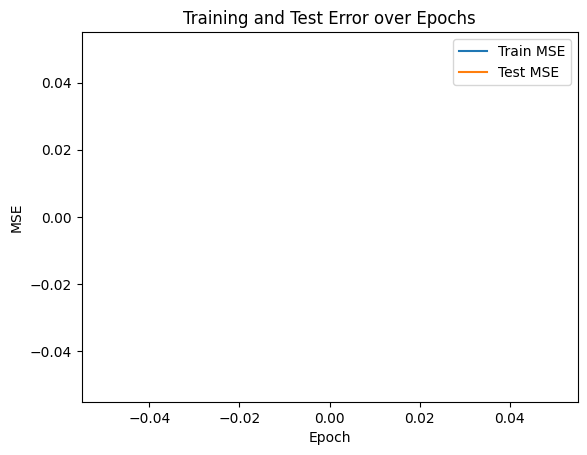

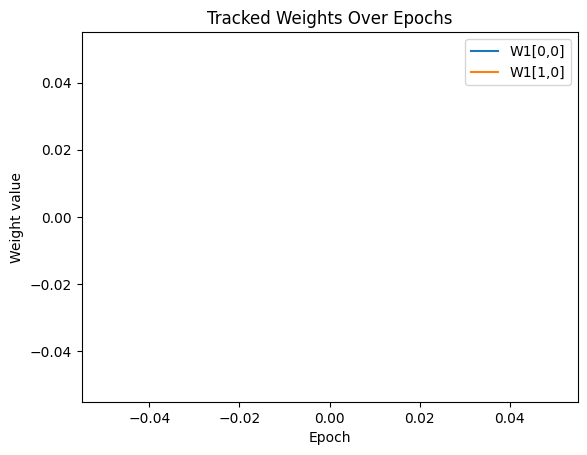

nan
nan


In [ ]:
learning_rate = 1
layers_dim = [32,64,32,16]
activations = [Relu(),Relu(),Relu(),Relu(),Linear()]
mlp = MLP(layers_dim=layers_dim,activations=activations,costFcn=MSE())
mlp.fit(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,batch_size=1,learning_rate=learning_rate,num_epochs=200)

print(mlp.score(X_train,y_train))
print(mlp.score(X_test,y_test))

Training Progress: 100%|██████████| 200/200 [02:56<00:00,  1.13it/s]


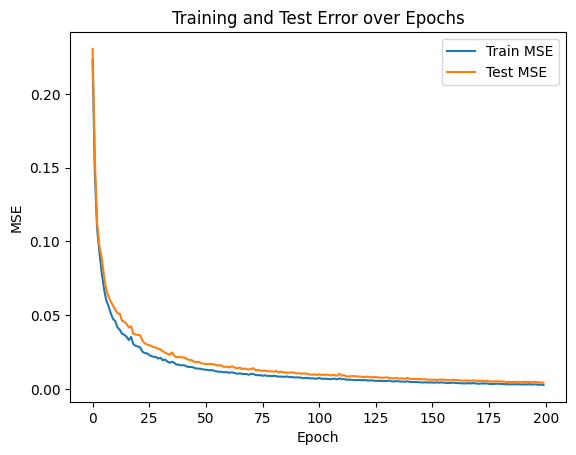

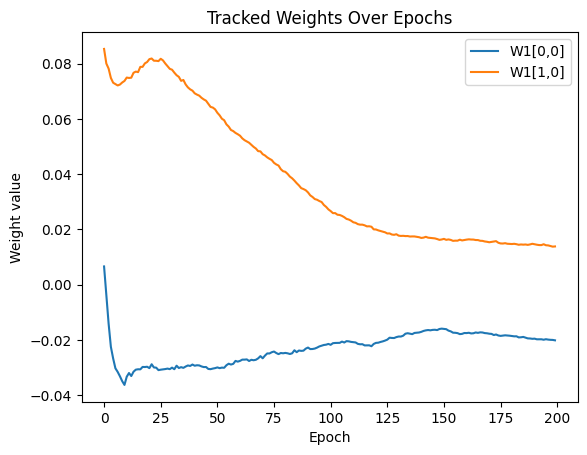

0.0028020057403416315
0.004338531061525915


In [ ]:
learning_rate = 0.001
layers_dim = [32,64,32,16]
activations = [Relu(),Relu(),Relu(),Relu(),Linear()]
mlp = MLP(layers_dim=layers_dim,activations=activations,costFcn=MSE())
mlp.fit(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,batch_size=1,learning_rate=learning_rate,num_epochs=200)

print(mlp.score(X_train,y_train))
print(mlp.score(X_test,y_test))

Training Progress: 100%|██████████| 200/200 [02:53<00:00,  1.15it/s]


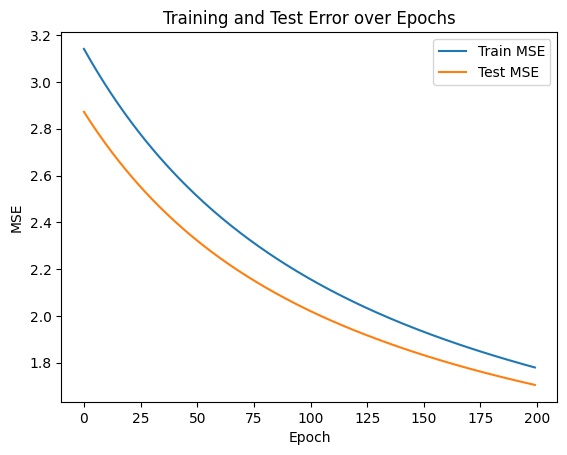

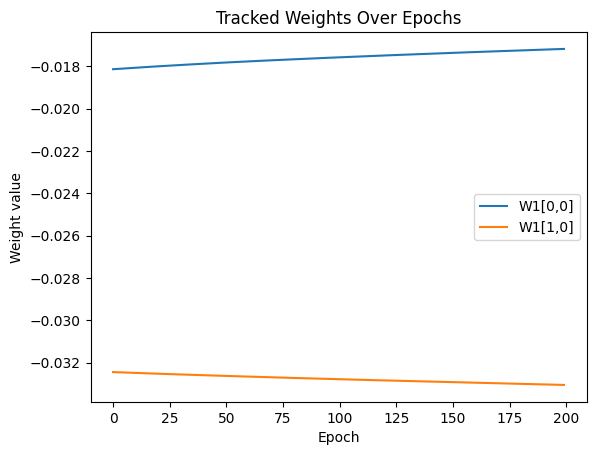

1.7794027223529885
1.704797588389082


In [ ]:
learning_rate = 0.00000001
layers_dim = [32,64,32,16]
activations = [Relu(),Relu(),Relu(),Relu(),Linear()]
mlp = MLP(layers_dim=layers_dim,activations=activations,costFcn=MSE())
mlp.fit(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,batch_size=1,learning_rate=learning_rate,num_epochs=200)

print(mlp.score(X_train,y_train))
print(mlp.score(X_test,y_test))